<a href="https://colab.research.google.com/github/rajgupta-github/DeepLearning-with-Python/blob/master/NeuralNetwork/Regression/Predict_Bike_Rental_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext tensorboard

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pd.options.display.float_format = "{:,.2f}".format

In [0]:
bike_data = pd.read_csv('/content/drive/My Drive/TensorFlow/bike_sharing_daily.csv')


In [3]:
display(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


None

In [8]:
display(bike_data.describe(include="all"))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.00,731,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
unique,nan,731,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,12/12/2012,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,366.00,NaN,2.50,0.50,6.52,0.03,3.00,0.68,1.40,0.50,0.63,0.19,848.18,"3,656.17","4,504.35"
std,211.17,NaN,1.11,0.50,3.45,0.17,2.00,0.47,0.54,0.18,0.14,0.08,686.62,"1,560.26","1,937.21"
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.06,0.00,0.02,2.00,20.00,22.00
25%,183.50,NaN,2.00,0.00,4.00,0.00,1.00,0.00,1.00,0.34,0.52,0.13,315.50,"2,497.00","3,152.00"
50%,366.00,NaN,3.00,1.00,7.00,0.00,3.00,1.00,1.00,0.50,0.63,0.18,713.00,"3,662.00","4,548.00"
75%,548.50,NaN,3.00,1.00,10.00,0.00,5.00,1.00,2.00,0.66,0.73,0.23,"1,096.00","4,776.50","5,956.00"


In [26]:
display(bike_data.tail())

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.25,0.65,0.35,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.25,0.59,0.16,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.25,0.75,0.12,1341
2012-12-30,2012-12-30,1,1,12,0,0,0,1,0.26,0.48,0.35,1796
2012-12-31,2012-12-31,1,1,12,0,1,1,2,0.22,0.58,0.15,2729


In [11]:
bike_data.yr.unique()

array([0, 1])

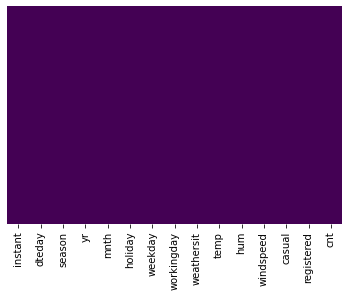

In [17]:
sns.heatmap(bike_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

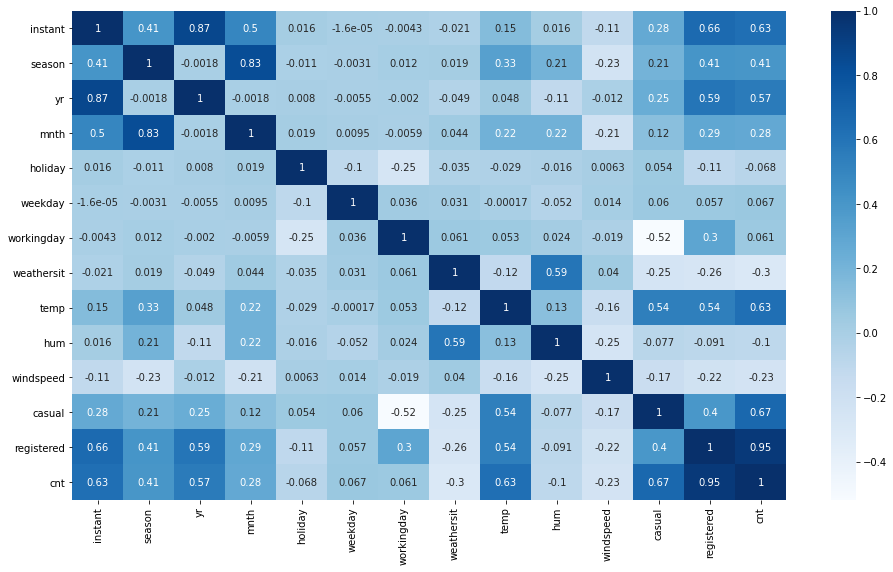

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(bike_data.corr(),cmap='Blues',annot=True) 

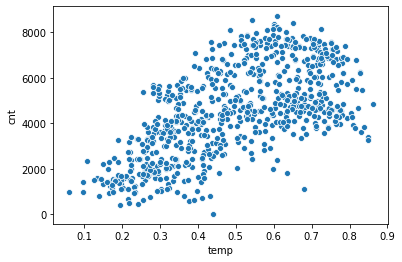

In [15]:
sns.scatterplot(bike_data['temp'], bike_data['cnt'])

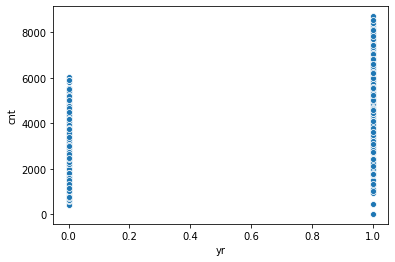

In [16]:
sns.scatterplot(bike_data['yr'], bike_data['cnt'])

In [0]:
bike_data.drop('instant', axis=1, inplace=True)

In [0]:
bike_data.drop(['casual', 'registered'], axis=1, inplace=True)

In [23]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   hum         731 non-null    float64       
 10  windspeed   731 non-null    float64       
 11  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 68.7 KB


In [0]:
bike_data.dteday = pd.to_datetime(bike_data.dteday, format='%m/%d/%Y')

In [0]:
bike_data.index = pd.DatetimeIndex(bike_data.dteday)

In [0]:
bike_data.drop('dteday', axis=1, inplace=True)

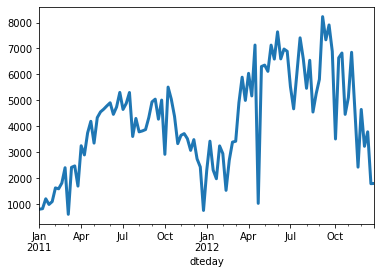

In [28]:
bike_data.cnt.asfreq('W').plot(linewidth=3)

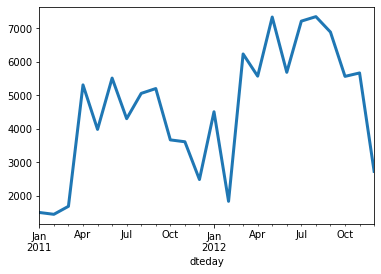

In [29]:
bike_data.cnt.asfreq('M').plot(linewidth=3)

In [0]:
bike_data_num = bike_data[['temp', 'hum', 'windspeed', 'cnt']]

In [34]:
bike_data_num.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.34,0.81,0.16,985
2011-01-02,0.36,0.70,0.25,801
2011-01-03,0.20,0.44,0.25,1349
2011-01-04,0.20,0.59,0.16,1562
2011-01-05,0.23,0.44,0.19,1600


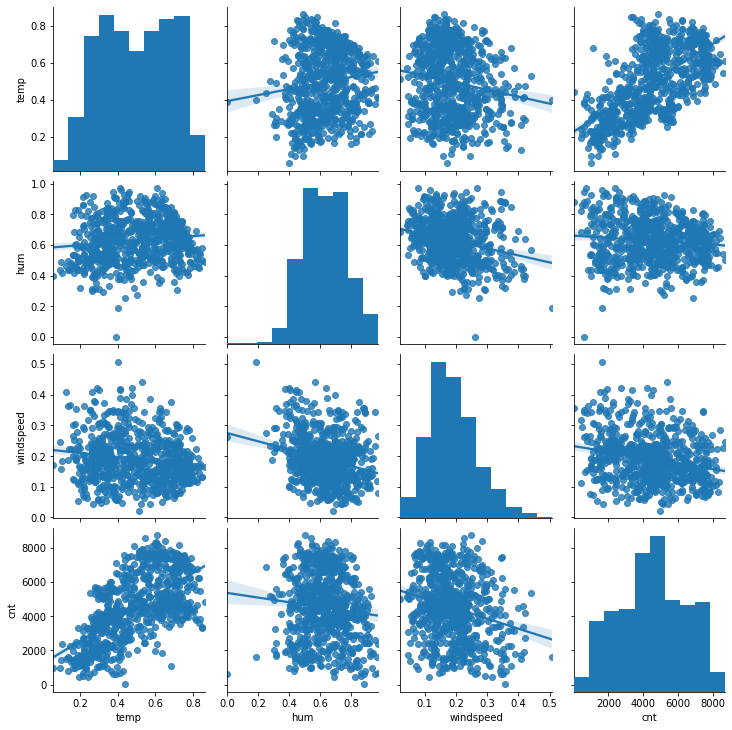

In [59]:
sns.pairplot(bike_data_num, aspect=1, kind='reg')

In [0]:
X_cat = bike_data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [38]:
X_cat.shape

(731, 32)

In [0]:
X_cat = pd.DataFrame(X_cat)

In [0]:
bike_data_num = bike_data_num.reset_index()

In [0]:
X_all = pd.concat([X_cat, bike_data_num], axis = 1)

In [44]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.34,0.81,0.16,985
1,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.36,0.70,0.25,801
2,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.20,0.44,0.25,1349
3,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.20,0.59,0.16,1562
4,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.23,0.44,0.19,1600


In [0]:
X_all = X_all.drop('dteday', axis = 1)

In [0]:
X = X_all.loc[:,X_all.columns != 'cnt'].values

In [57]:
X.shape

(731, 35)

In [47]:
y = X_all['cnt']


(731, 35)

In [0]:
y = y.values.reshape(-1,1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
X_train.shape

(584, 35)

In [61]:
X_test.shape

(147, 35)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35, )))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               3600      
_________________________________________________________________
dense_13 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 54,101
Trainable params: 54,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [89]:
epochs_hist = model.fit(X_train, y_train, epochs = 30, batch_size = 50, validation_split = 0.2)

Epoch 1/30
10/10 [==============================] - 0s 11ms/step - loss: 0.1297 - val_loss: 0.0504
Epoch 2/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0288 - val_loss: 0.0222
Epoch 3/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0164 - val_loss: 0.0177
Epoch 4/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.0200
Epoch 5/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0141
Epoch 6/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0130
Epoch 7/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0144
Epoch 8/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0119
Epoch 9/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0120
Epoch 10/30
10/10 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0116
Epoch 11/30
10/10 

In [90]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

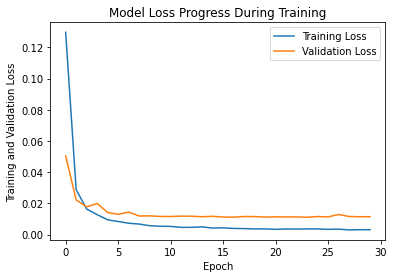

In [91]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

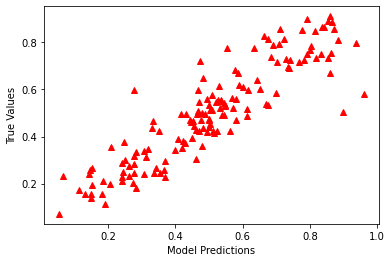

In [92]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [0]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


Text(0, 0.5, 'True Values')

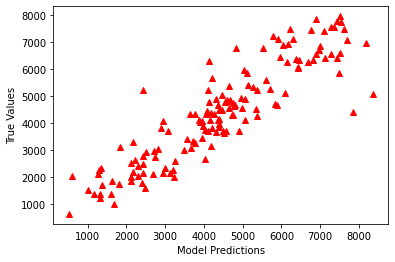

In [94]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [95]:
k = X_test.shape[1]
n = len(X_test)
n

147

In [96]:


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 828.493 
MSE = 686401.2886719157 
MAE = 605.5603197577859 
R2 = 0.8002049432947358 
Adjusted R2 = 0.7372065019912741
